In [35]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,f1_score
import graphviz
from graphviz import Source
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import urllib.request as urllib
import numpy as np

In [39]:
#Wyczytujemy dane z linka korzystajac z numpy

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data';
raw_data = urllib.urlopen(url)

In [40]:
 #Przetwarzamy danye do formatu CSV.

In [36]:
mydataset = np.loadtxt(raw_data, delimiter=",")
np.savetxt("glass.csv", mydataset, delimiter=",")

In [50]:
Headers = ["RI" , "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type of glass"]

In [42]:
#Wyczytujemy dane z glass.csv

In [51]:
glass_D = pd.read_csv('glass.csv',sep=",", header= None, names=Headers)
glass_ind = pd.DataFrame(glass_D)
glass_ind

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
1.0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0
2.0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0
3.0,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0
4.0,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0
5.0,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
210.0,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0
211.0,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0
212.0,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0
213.0,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0


In [ ]:
#Prewidywanie "Type of glass"

In [52]:
print(glass_ind["Type of glass"].unique())

[1. 2. 3. 5. 6. 7.]


In [ ]:
#Do przewidywania "Type of glass" korzystamy z Klasyfikatora

In [53]:
glass_ind.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
#Poprawnosc odczytania danych

In [55]:
glass_ind[glass_ind['Type of glass']==1]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
1.0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1.0
2.0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1.0
3.0,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1.0
4.0,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1.0
5.0,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...
66.0,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.0,0.00,1.0
67.0,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.0,0.17,1.0
68.0,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1.0
69.0,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1.0


In [56]:
glass_ind.isna().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [ ]:
#Widzimy że niema kolumn z brakiem danych

In [ ]:
#Zadamy atrybuty ot ktorych zalezy wyniik

In [57]:
X = glass_ind.loc[:,['RI', 'Na', 'Mg','Al']]
y = glass_ind.loc[:,'Type of glass']
X
y

1.0      1.0
2.0      1.0
3.0      1.0
4.0      1.0
5.0      1.0
        ... 
210.0    7.0
211.0    7.0
212.0    7.0
213.0    7.0
214.0    7.0
Name: Type of glass, Length: 214, dtype: float64

In [ ]:
# Generacja drzewa

In [58]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

In [ ]:
#Rysowanie drzewa

[Text(0.3854166666666667, 0.9615384615384616, 'X[2] <= 2.695\ngini = 0.737\nsamples = 214\nvalue = [70, 76, 17, 13, 9, 29]'),
 Text(0.12962962962962962, 0.8846153846153846, 'X[1] <= 13.785\ngini = 0.706\nsamples = 61\nvalue = [0, 13, 0, 13, 9, 26]'),
 Text(0.07407407407407407, 0.8076923076923077, 'X[0] <= 1.524\ngini = 0.538\nsamples = 24\nvalue = [0, 11, 0, 12, 0, 1]'),
 Text(0.05555555555555555, 0.7307692307692307, 'X[1] <= 13.495\ngini = 0.443\nsamples = 17\nvalue = [0, 4, 0, 12, 0, 1]'),
 Text(0.037037037037037035, 0.6538461538461539, 'X[3] <= 1.295\ngini = 0.142\nsamples = 13\nvalue = [0, 0, 0, 12, 0, 1]'),
 Text(0.018518518518518517, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1]'),
 Text(0.05555555555555555, 0.5769230769230769, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0, 0]'),
 Text(0.07407407407407407, 0.6538461538461539, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0, 0, 0, 0]'),
 Text(0.09259259259259259, 0.7307692307692307, 'gini = 0.0\nsamples 

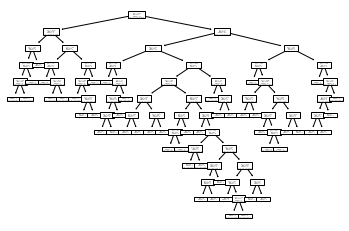

In [59]:
tree.plot_tree(clf)

In [60]:
data = tree.export_graphviz(clf,filled=True, feature_names=['RI', 'Na', 'Mg','Al'], class_names = ['1', '2', '3', '5','6', '7'])

In [ ]:
#Kolorowanie drzewa 

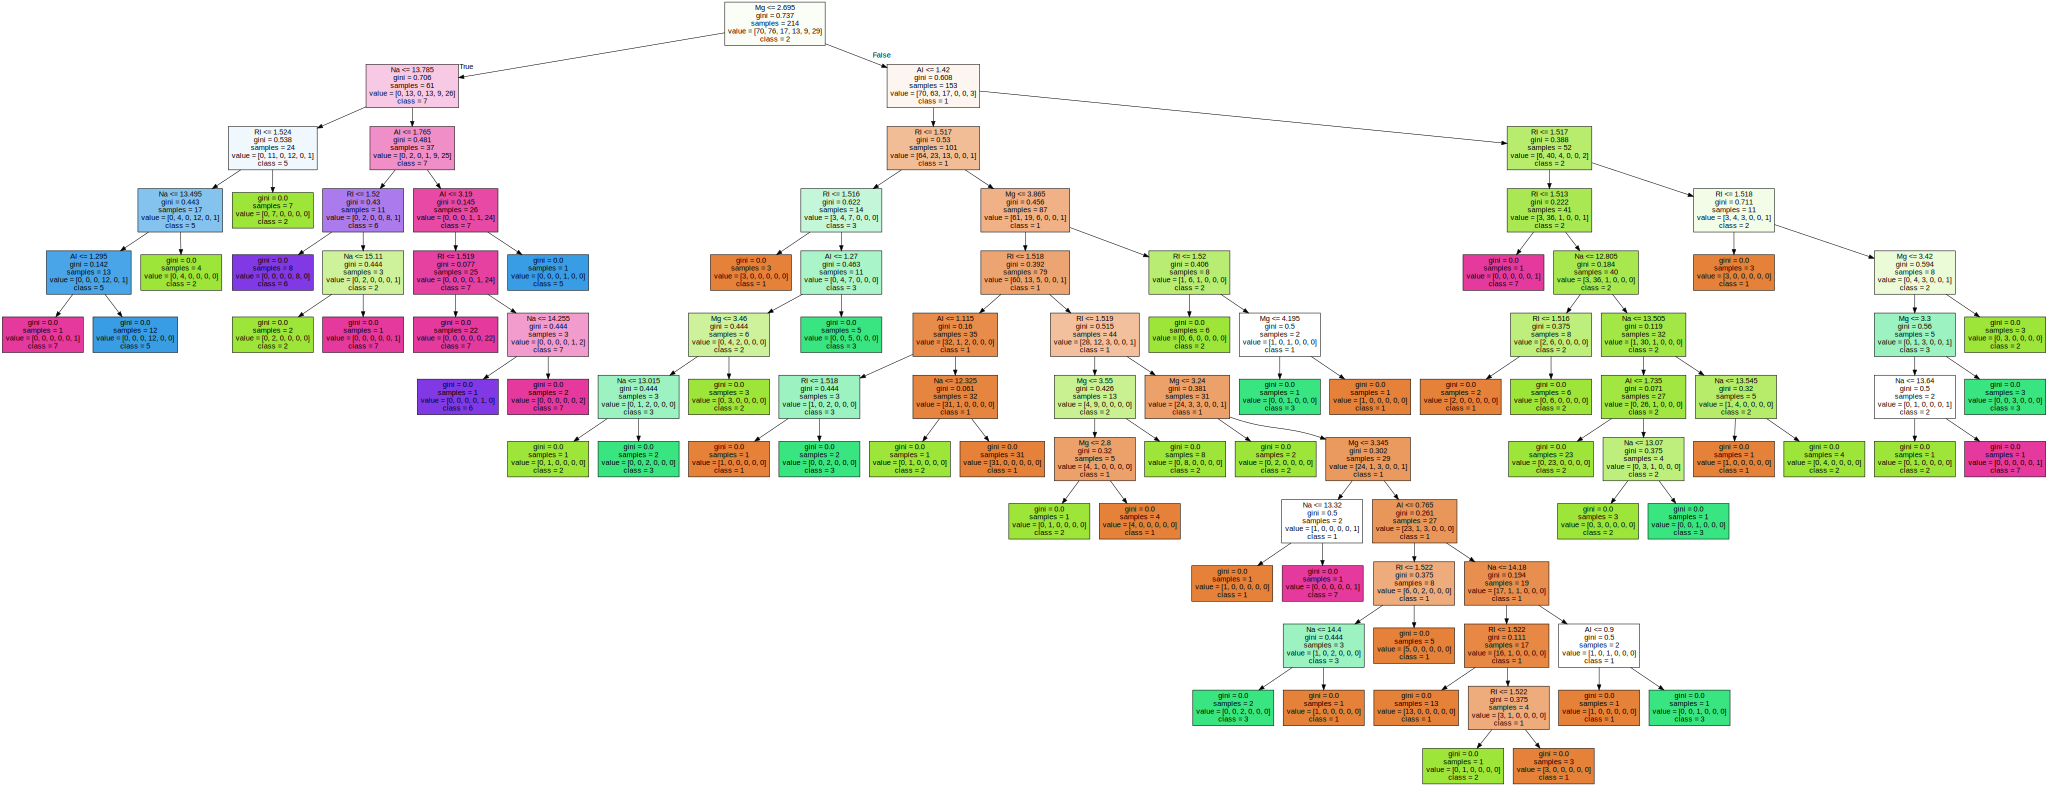

In [61]:
graph=graphviz.Source(data)
graph


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train

,RI,Na,Mg,Al
116.0,1.51846,13.41,3.89,1.33
132.0,1.52614,13.70,0.00,1.36
130.0,1.52020,13.98,1.35,1.63
104.0,1.52725,13.80,3.15,0.66
102.0,1.51730,12.35,2.72,1.63
...,...,...,...,...
148.0,1.51610,13.33,3.53,1.34
152.0,1.52127,14.32,3.90,0.83
7.0,1.51743,13.30,3.60,1.14
67.0,1.52152,13.05,3.65,0.87


In [63]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [64]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [66]:
params = dict()
params['n_estimators'] = [200, 215]
params['max_depth'] = [10, 15, 20, 25,30, 35, 40, 45, 50]

In [67]:
search = GridSearchCV(rf, params)
results = search.fit(X_train, y_train)
best = results.best_estimator_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [68]:
best

RandomForestClassifier(max_depth=10, n_estimators=200)

In [69]:
best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [70]:
X = scaler.fit_transform(X)
X

array([[0.43283582, 0.43759398, 1.        , 0.25233645],
       [0.28358209, 0.47518797, 0.80178174, 0.33333333],
       [0.22080773, 0.42105263, 0.79064588, 0.3894081 ],
       [0.285777  , 0.37293233, 0.82182628, 0.31152648],
       [0.27524144, 0.38195489, 0.80623608, 0.29595016],
       [0.21115013, 0.30977444, 0.80400891, 0.41433022],
       [0.27568042, 0.38646617, 0.80178174, 0.26479751],
       [0.28138718, 0.36390977, 0.80400891, 0.23676012],
       [0.35250219, 0.49774436, 0.79732739, 0.3364486 ],
       [0.2809482 , 0.34135338, 0.80178174, 0.33333333],
       [0.20017559, 0.29924812, 0.77060134, 0.39563863],
       [0.28446005, 0.3112782 , 0.81514477, 0.30529595],
       [0.20807726, 0.32330827, 0.76391982, 0.34579439],
       [0.27787533, 0.32030075, 0.79287305, 0.30529595],
       [0.28446005, 0.28270677, 0.79955457, 0.31775701],
       [0.28358209, 0.31278195, 0.78841871, 0.29283489],
       [0.29367867, 0.29323308, 0.81737194, 0.27102804],
       [0.47453907, 0.54586466,

In [71]:
glass_ind['Type of glass  prediction'] = best.predict(X)

In [72]:
glass_ind

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type of glass prediction
1.0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0,2.0
2.0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0,2.0
3.0,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0,2.0
4.0,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0,2.0
5.0,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
210.0,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0,5.0
211.0,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0,7.0
212.0,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0,5.0
213.0,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0,7.0


In [ ]:
#Jesli byloby wybrano wiecej parametrow dla dzrewa deczyjnego wtedy wynik bylby liepszy

In [73]:
glass_ind.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type of glass prediction
1.0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0,2.0
2.0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0,2.0
3.0,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0,2.0
4.0,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0,2.0
5.0,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0,1.0


In [74]:
X = glass_ind.loc[:,['RI',	'Na','Mg','Al',	'Si',	'K','Ca',	'Ba','Fe']]
y = glass_ind.loc[:,'Type of glass']
X
y


1.0      1.0
2.0      1.0
3.0      1.0
4.0      1.0
5.0      1.0
        ... 
210.0    7.0
211.0    7.0
212.0    7.0
213.0    7.0
214.0    7.0
Name: Type of glass, Length: 214, dtype: float64

In [75]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

[Text(0.7457146624472574, 0.9615384615384616, 'X[7] <= 0.335\ngini = 0.737\nsamples = 214\nvalue = [70, 76, 17, 13, 9, 29]'),
 Text(0.5589398734177216, 0.8846153846153846, 'X[3] <= 1.42\ngini = 0.681\nsamples = 185\nvalue = [69, 75, 17, 12, 9, 3]'),
 Text(0.3815928270042194, 0.8076923076923077, 'X[6] <= 10.48\ngini = 0.6\nsamples = 113\nvalue = [63, 31, 13, 1, 3, 2]'),
 Text(0.2231012658227848, 0.7307692307692307, 'X[0] <= 1.517\ngini = 0.55\nsamples = 101\nvalue = [63, 21, 13, 0, 2, 2]'),
 Text(0.06751054852320675, 0.6538461538461539, 'X[0] <= 1.516\ngini = 0.703\nsamples = 16\nvalue = [3, 4, 7, 0, 1, 1]'),
 Text(0.03375527426160337, 0.5769230769230769, 'X[2] <= 1.715\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 0, 0, 1, 0]'),
 Text(0.016877637130801686, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.05063291139240506, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0, 0]'),
 Text(0.10126582278481013, 0.5769230769230769, 'X[3] <= 1.27\ngini = 0.542\nsamples = 1

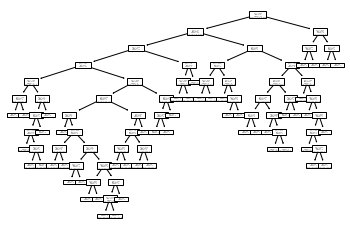

In [76]:
tree.plot_tree(clf)

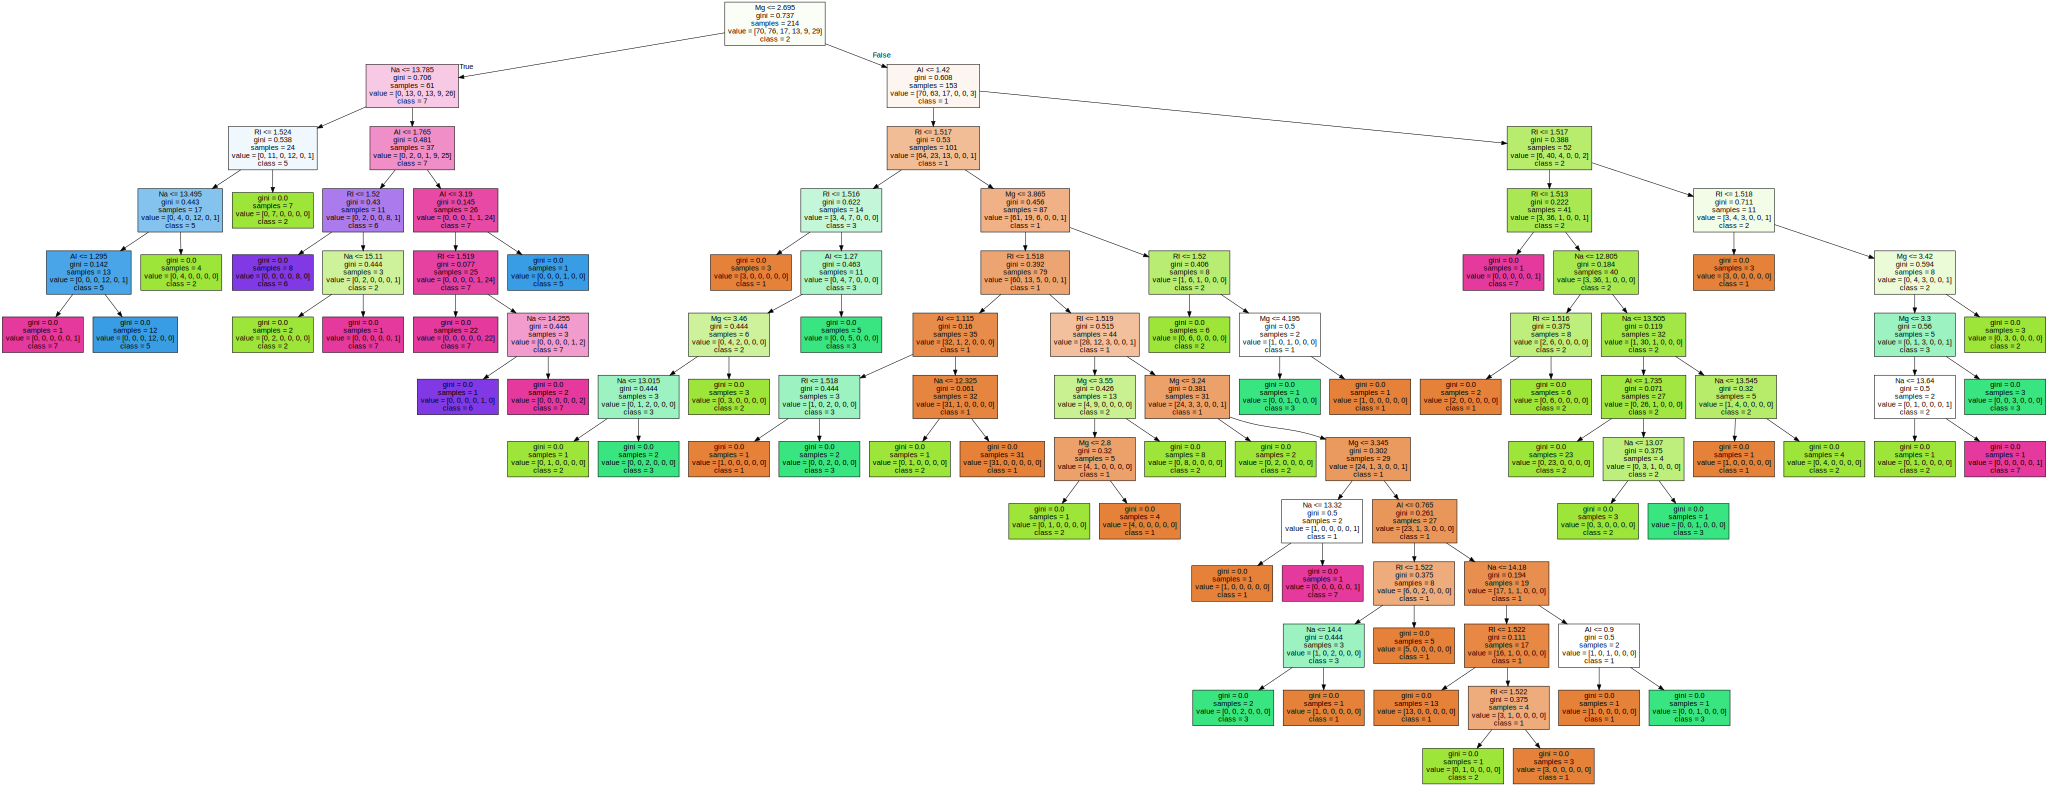

In [77]:
graph=graphviz.Source(data)
graph


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
143.0,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25
112.0,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00
28.0,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00
127.0,1.51667,12.94,3.61,1.26,72.75,0.56,8.60,0.00,0.00
113.0,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00
...,...,...,...,...,...,...,...,...,...
156.0,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.00,0.00
129.0,1.52068,13.55,2.09,1.67,72.18,0.53,9.57,0.27,0.17
186.0,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00
145.0,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24


In [79]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [80]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [82]:
search = GridSearchCV(rf, params)
results = search.fit(X_train, y_train)
best = results.best_estimator_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [83]:
best.fit(X_train, y_train)

RandomForestClassifier(max_depth=35, n_estimators=215)

In [84]:
X = scaler.fit_transform(X)
X

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [85]:
glass_ind['Type of glass  prediction 1'] = best.predict(X)

In [86]:
glass_ind

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type of glass prediction,Type of glass prediction 1
1.0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0,2.0,1.0
2.0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0,2.0,1.0
3.0,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0,2.0,2.0
4.0,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0,2.0,2.0
5.0,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210.0,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0,5.0,7.0
211.0,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0,7.0,7.0
212.0,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0,5.0,7.0
213.0,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0,7.0,7.0


In [87]:
glass_ind

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type of glass prediction,Type of glass prediction 1
1.0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0,2.0,1.0
2.0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0,2.0,1.0
3.0,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0,2.0,2.0
4.0,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0,2.0,2.0
5.0,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210.0,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0,5.0,7.0
211.0,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0,7.0,7.0
212.0,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0,5.0,7.0
213.0,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0,7.0,7.0


In [ ]:
#Jak widac z wynikow kiedy bierzemy wiecej parametrow dla studiowania dane przewidywane sa lepsze